# EDA with Python
### Auther: *Kamran Manzoor*

### Exploratory Data analysis
##### Three important steps to keep in mind are:
- 1. Undertanding the data
- 2. Clean the data
- 3. Find a relationship between data

In [225]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
df = pd.read_excel("../dataset/titanic.xlsx")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [227]:
print(f"rows ans columns :{df.shape}")
df.tail()

rows ans columns :(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [228]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [229]:
# unique values in each column
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [230]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [231]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

cleaning and filtering missing values

In [232]:
# find missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [233]:
# drop column of deck (for cleaning data)
df_clean = df.drop(columns=['deck'], axis=1)
df_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [234]:
df_clean.shape

(891, 14)

In [235]:
891-177

714

In [236]:
df_clean = df_clean.dropna()

In [237]:
df_clean.shape

(712, 14)

In [238]:
df_clean.isnull().sum()  # removed all missing values

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [239]:
df_clean['sex'].value_counts()

sex
male      453
female    259
Name: count, dtype: int64

In [240]:
print(df.describe())

print("--_--------__------__-----__------_------_-------")

print(df_clean.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
--_--------__------__-----__------_------_-------
         survived      pclass         age       sibsp       parch        fare
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000
mean     0.404494    2.240169   29.642093    0.514045    0.432584   34.567251
std      0.491

In [241]:
df_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<Axes: ylabel='age'>

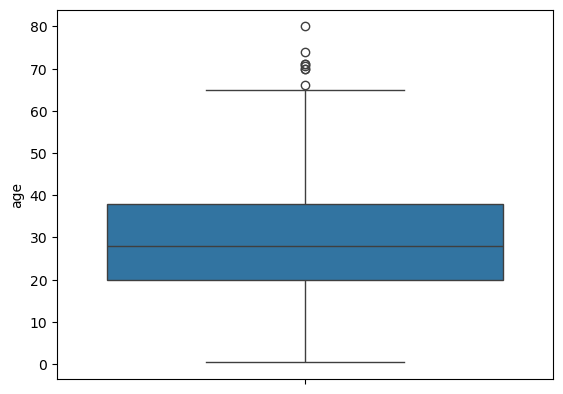

In [242]:
sns.boxplot( y='age', data=df_clean)

C:\Users\Kamran\AppData\Local\Temp\ipykernel_8292\1061399267.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean ['age'])


<Axes: xlabel='age', ylabel='Density'>

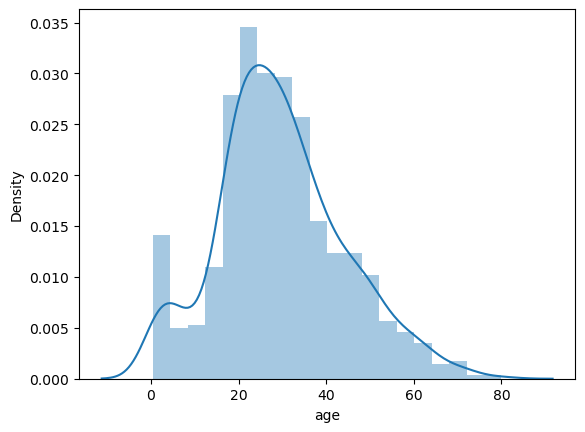

In [243]:
sns.distplot(df_clean ['age'])

In [244]:
# outliers removal
print(df_clean['age'].mean())

29.64209269662921


In [245]:
df_clean = df_clean[df_clean['age'] < 68]
df_clean.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [246]:
df_clean.shape

(705, 14)

In [247]:
print(df_clean['age'].mean())

29.21797163120567


C:\Users\Kamran\AppData\Local\Temp\ipykernel_8292\1061399267.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean ['age'])


<Axes: xlabel='age', ylabel='Density'>

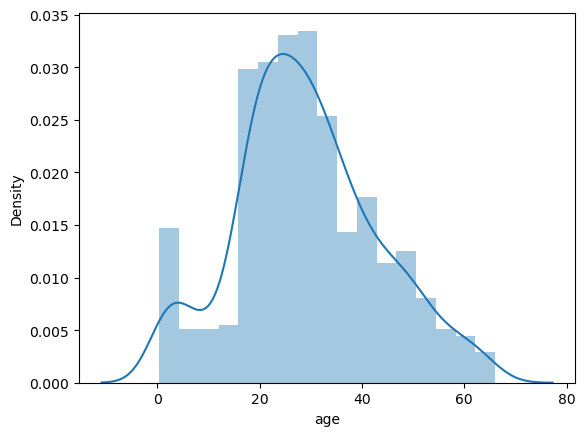

In [248]:
sns.distplot(df_clean ['age'])

<Axes: ylabel='age'>

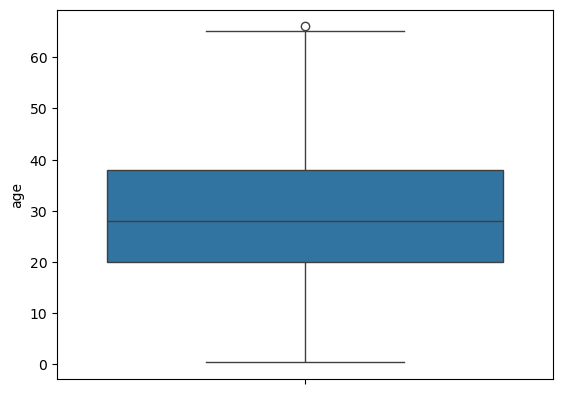

In [249]:
sns.boxplot( y='age', data=df_clean)

In [250]:
df_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<Axes: >

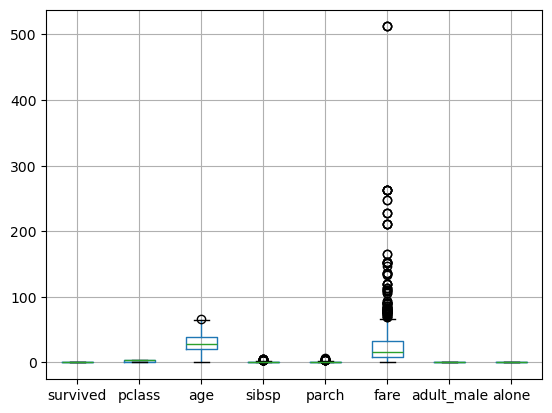

In [251]:
df_clean.boxplot()

<Axes: >

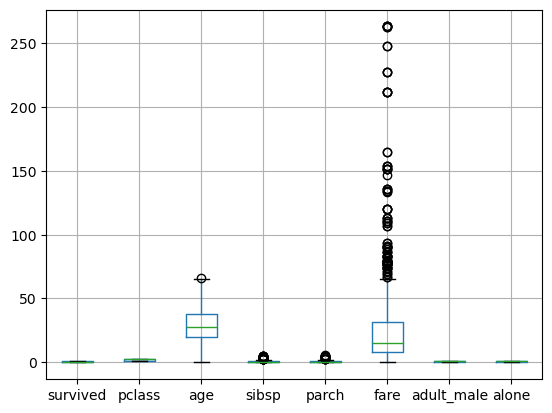

In [252]:
df_clean = df_clean[df_clean['fare'] <300]
df_clean.boxplot()

C:\Users\Kamran\AppData\Local\Temp\ipykernel_8292\2878667933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean ['fare'])


<Axes: xlabel='fare', ylabel='Density'>

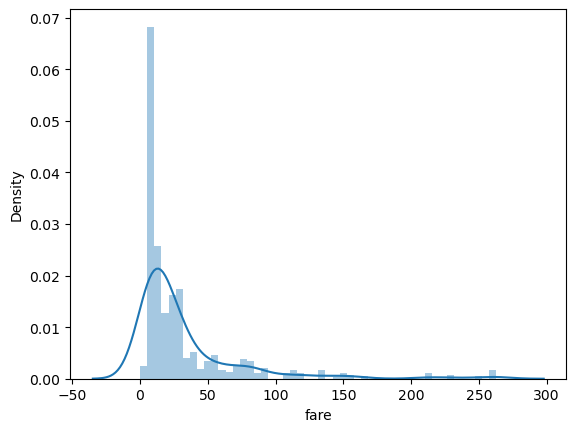

In [253]:
sns.distplot(df_clean ['fare'])

In [262]:
# log transformation
df_clean['fare_log'] = np.log(df_clean['fare'])
df_clean.head()

c:\Users\Kamran\miniconda3\envs\data_analysis\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672


array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

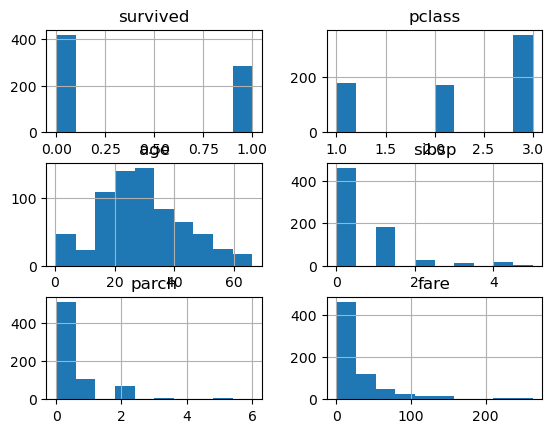

In [254]:
df_clean.hist()

C:\Users\Kamran\AppData\Local\Temp\ipykernel_8292\2111076803.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_clean['survived']).plot.bar()


<Axes: xlabel='survived'>

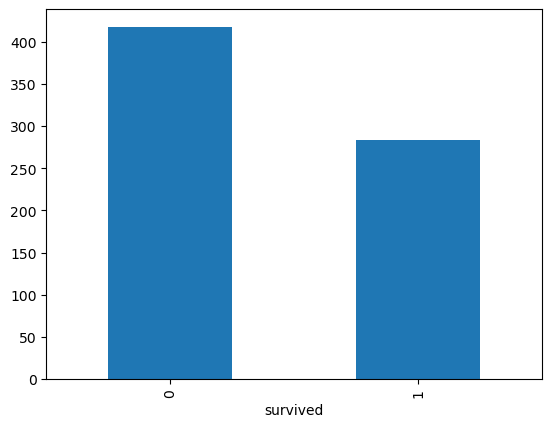

In [255]:
pd.value_counts(df_clean['survived']).plot.bar()

In [256]:
# df.groupby(["sex", "class"]).mean()


#### Relationship

In [257]:
corr_df_clean = df_clean.corr(numeric_only=True)

Axes(0.125,0.11;0.62x0.77)


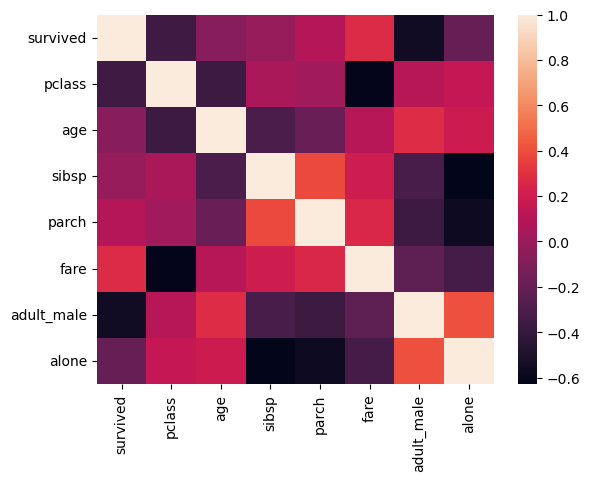

In [258]:
print(sns.heatmap(corr_df_clean))



_______________________________________
Axes(0.125,0.11;0.62x0.77)


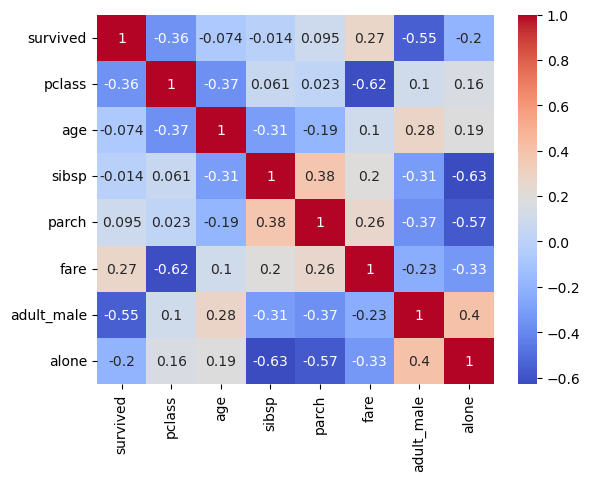

In [259]:
print("_______________________________________")
print(sns.heatmap(corr_df_clean, annot=True, cmap='coolwarm'))

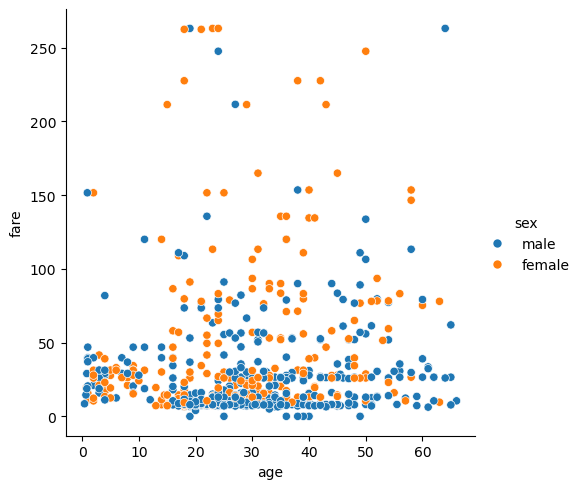

In [260]:
sns.relplot(x='age', y='fare', data=df_clean, hue='sex')

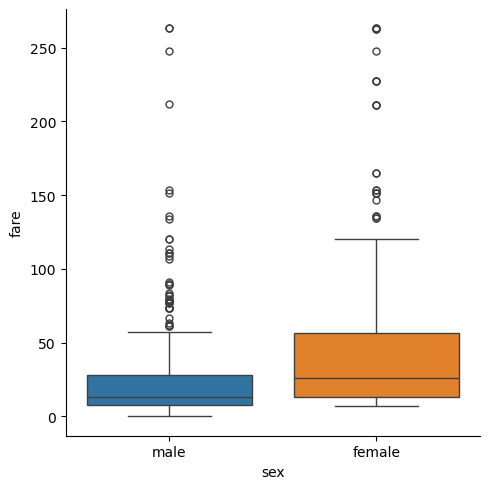

In [261]:
sns.catplot(x='sex', y='fare', data=df_clean, hue='sex', kind='box')